In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('gurgaon_properties_cleaned_v2.csv')
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,store room,pooja room,others,servant room,furnishing_type,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,0,0,1,0,0,0,91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,0,0,0,0,0,1,0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,0,0,0,0,0,2,14
3,flat,sector 109,ats kocoon,1.70,9742.0,1745.02,Super Built up area 1745(162.12 sq.m.)Built Up...,NaN,1550.0,1745.0,3.0,3.0,3,22.0,East,Relatively New,0,0,0,0,0,1,74
4,flat,sector 37c,corona optus,1.50,6361.0,2358.12,Super Built up area 2358(219.07 sq.m.),NaN,NaN,2358.0,3.0,4.0,3+,14.0,North-East,New Property,0,0,0,1,1,1,83


In [3]:
df.shape

(3796, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     3796 non-null   object 
 1   sector_info       3796 non-null   object 
 2   society           3241 non-null   object 
 3   price             3795 non-null   float64
 4   price_per_sqft    3795 non-null   float64
 5   area              3795 non-null   float64
 6   areaWithType      3796 non-null   object 
 7   carpet_area       1923 non-null   float64
 8   built_up_area     1778 non-null   float64
 9   super_built_area  1869 non-null   float64
 10  bedRoom           3796 non-null   float64
 11  bathroom          3796 non-null   float64
 12  balcony           3796 non-null   object 
 13  floorNum          3772 non-null   float64
 14  facing            2700 non-null   object 
 15  agePossession     3796 non-null   object 
 16  study room        3796 non-null   int64  


In [5]:
df.isna().sum().sort_values(ascending=False)

built_up_area       2018
super_built_area    1927
carpet_area         1873
facing              1096
society              555
floorNum              24
price                  1
price_per_sqft         1
area                   1
property_type          0
study room             0
furnishing_type        0
servant room           0
others                 0
pooja room             0
store room             0
bathroom               0
agePossession          0
balcony                0
sector_info            0
bedRoom                0
areaWithType           0
luxury_score           0
dtype: int64

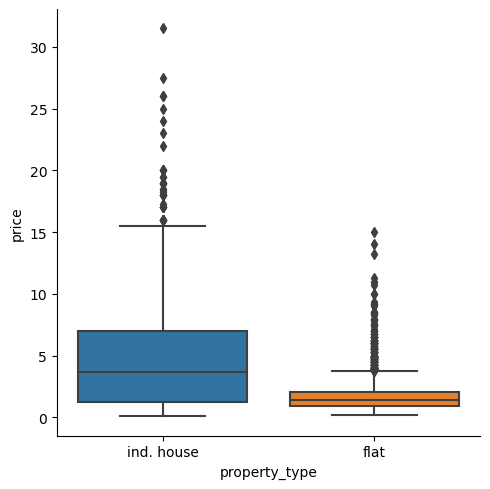

In [6]:
sns.catplot(data=df,x='property_type',y='price',kind='box')

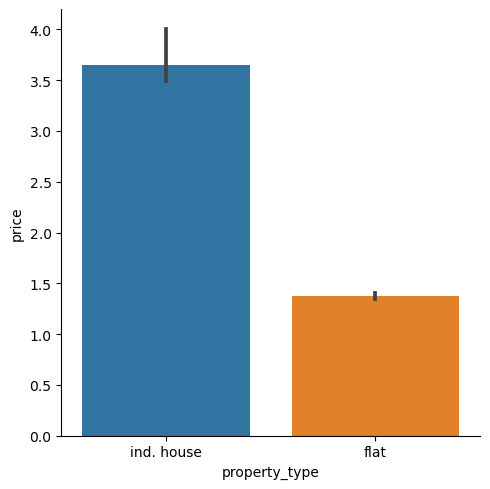

In [7]:
sns.catplot(data=df,x='property_type',y='price',kind='bar',estimator='median')

In [8]:
df[df['property_type']=='ind. house']['price'].describe()

count    933.000000
mean       4.954920
std        4.661888
min        0.080000
25%        1.200000
50%        3.650000
75%        7.000000
max       31.500000
Name: price, dtype: float64

In [9]:
df[df['property_type']=='flat']['price'].describe()

count    2862.000000
mean        1.707477
std         1.385783
min         0.160000
25%         0.900000
50%         1.380000
75%         2.040000
max        15.000000
Name: price, dtype: float64

C:\Users\kapil\AppData\Local\Temp\ipykernel_25904\826223069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['property_type']=='ind. house']['price'],hist=False,color='lightgreen',label='ind. house price distribution')
C:\Users\kapil\AppData\Local\Temp\ipykernel_25904\826223069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

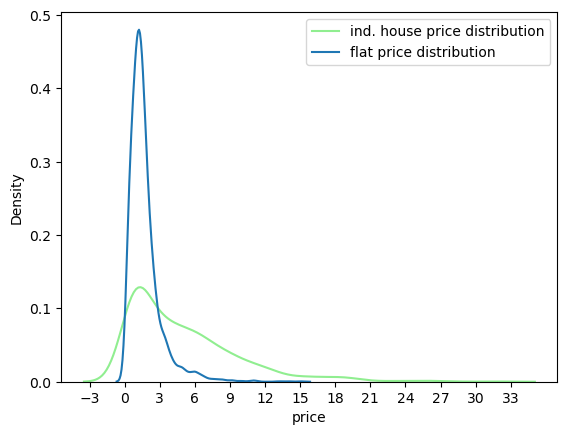

In [10]:
sns.distplot(df[df['property_type']=='ind. house']['price'],hist=False,color='lightgreen',label='ind. house price distribution')
sns.distplot(df[df['property_type']=='flat']['price'],hist=False,label='flat price distribution')
plt.xticks([-3,0,3,6,9,12,15,18,21,24,27,30,33])
plt.legend()


In [11]:
iqr_house=df[df['property_type']=='ind. house']['price'].quantile(0.75)-df[df['property_type']=='ind. house']['price'].quantile(0.25)
upper_range_house=df[df['property_type']=='ind. house']['price'].quantile(0.75)+1.5*iqr_house
upper_range_house

15.7

In [12]:
iqr_house=df[df['property_type']=='flat']['price'].quantile(0.75)-df[df['property_type']=='flat']['price'].quantile(0.25)
upper_range_flat=df[df['property_type']=='flat']['price'].quantile(0.75)+1.5*iqr_house
upper_range_flat

3.75

 Price And property type:
         
Price Ranges:

Independent houses have a wider price range, typically ranging from 1.2 crore to 7 crore.
Flats generally have a narrower price range, falling between 0.9 crore to 2.4 crore.

Cost Comparison:

Flats tend to be less costly compared to independent houses, as indicated by their lower median value (1.38 crore for flats vs. 3.6 crore for independent houses).

Price Categories:

Flats in the price range of 0.9 to 3 crore are more common, suggesting a higher likelihood of finding flats within this range.
Independent houses are more prevalent in the higher price range, especially above 3 crore.

Outliers:

Independent houses priced above 15 crore are considered outliers. This implies that there are relatively few independent houses at such high prices, possibly indicating luxury properties or unique offerings.
Flats priced above 3.75 crore are considered outliers. This suggests that there are fewer flats at extremely high prices compared to the majority of the flat listings.

Standard Deviation:

The high standard deviation indicates a significant variability in property prices, both for flats and independent houses. This variability contributes to a wider spread of values around the mean.
Overall, the analysis suggests that while flats are generally more affordable than independent houses and are more likely to fall within the mid-price range, independent houses cover a broader spectrum of prices and are more prevalent in the luxury segment. The presence of outliers in both categories indicates that there are properties that deviate significantly from the average price range, likely due to unique features, locations, or other factors influencing their value.
         

In [13]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,store room,pooja room,others,servant room,furnishing_type,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,0,0,1,0,0,0,91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,0,0,0,0,0,1,0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,0,0,0,0,0,2,14
3,flat,sector 109,ats kocoon,1.70,9742.0,1745.02,Super Built up area 1745(162.12 sq.m.)Built Up...,NaN,1550.0,1745.0,3.0,3.0,3,22.0,East,Relatively New,0,0,0,0,0,1,74
4,flat,sector 37c,corona optus,1.50,6361.0,2358.12,Super Built up area 2358(219.07 sq.m.),NaN,NaN,2358.0,3.0,4.0,3+,14.0,North-East,New Property,0,0,0,1,1,1,83


In [14]:
df.groupby('sector_info')['price'].agg(['mean','median','count','min','max']).sort_values(by=['median','mean'],ascending=[False,False])

,mean,median,count,min,max
sector_info,,,,,
sector 26,12.541961,12.500,51,3.25,31.50
sector 44,10.056667,9.250,6,1.49,17.00
sector 25,8.690682,8.000,44,3.40,16.00
sector 17b,7.550000,7.200,3,6.95,8.50
sector 41,6.962500,7.125,12,1.65,16.00
sector 50,6.695469,6.975,64,1.05,15.00
sector 42,6.500000,6.500,1,6.50,6.50
sector 53,5.782857,5.800,14,4.00,8.25
sector 21a,5.700000,5.700,1,5.70,5.70


In [15]:
top_20_expensive_sector=df.groupby('sector_info')['price'].median().sort_values(ascending= False).head(20)

<Axes: ylabel='sector_info'>

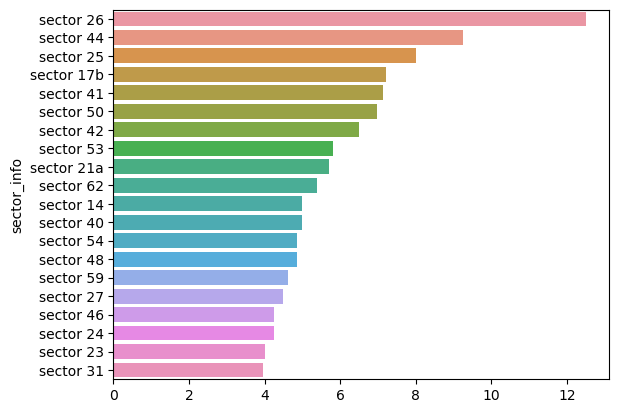

In [16]:
sns.barplot(x=top_20_expensive_sector.values,y=top_20_expensive_sector.index)

In [17]:
top_20_cheapest_sector=df.groupby('sector_info')['price'].median().sort_values(ascending= False).tail(20)

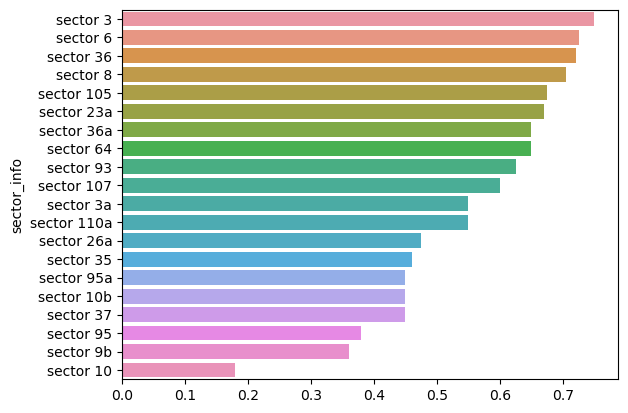

In [18]:
sns.barplot(x=top_20_cheapest_sector.values,y=top_20_cheapest_sector.index);

sector_info column to many category but seems that some of the sector are having very high price for houses and flats and some sectors are comparitively cheap 

top 20 expensive sectors are sector 26,44,25,17b,41,50,42,53,21a,62,14,40,54,48,59,27,46,24,23,31

top 20 cheap sectors are sector 10,9b,95,37,10b,95a,35,26a,110a,3a,107,93,64,36a,23a,105,8,36,6,3

In [19]:
df[['price','balcony']]

,price,balcony
0,5.00,3+
1,0.37,2
2,0.53,2
3,1.70,3
4,1.50,3+
5,1.34,0
6,18.00,3+
7,1.45,3+
8,13.50,3
9,0.40,1


In [20]:
df['balcony']=df['balcony'].str.strip()

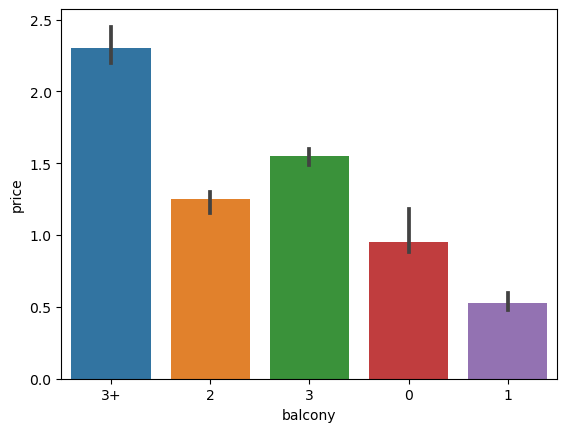

In [21]:
sns.barplot(x=df['balcony'],y=df['price'],estimator='median');

In [22]:
df.groupby('balcony')['price'].agg(['count','mean','std','median','min','max'])

,count,mean,std,median,min,max
balcony,,,,,,
0,196,1.817245,2.223516,0.950,0.08,13.5
1,406,0.916133,1.364782,0.525,0.18,18.5
2,921,1.910977,2.300202,1.250,0.16,24.0
3,1093,2.348545,2.487972,1.550,0.30,22.0
3+,1179,3.778321,3.736135,2.300,0.39,31.5


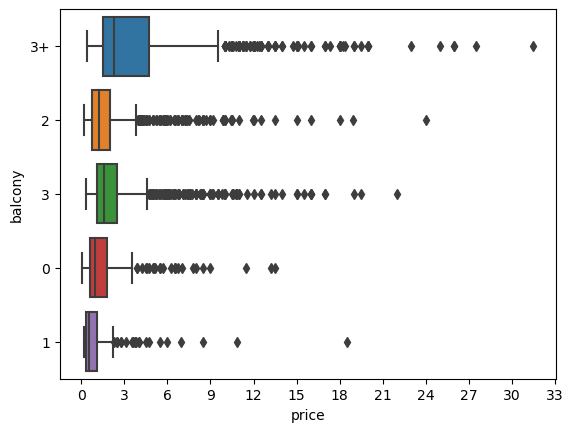

In [23]:
sns.boxplot(x=df['price'],y=df['balcony'])
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33]);

In [24]:
for i in list(df['balcony'].value_counts().index):
    print(f"Stat summery of price with {i} balcony")
    print(df[df['balcony']==i]['price'].describe())


Stat summery of price with 3+ balcony
count    1179.000000
mean        3.778321
std         3.736135
min         0.390000
25%         1.500000
50%         2.300000
75%         4.750000
max        31.500000
Name: price, dtype: float64
Stat summery of price with 3 balcony
count    1093.000000
mean        2.348545
std         2.487972
min         0.300000
25%         1.100000
50%         1.550000
75%         2.500000
max        22.000000
Name: price, dtype: float64
Stat summery of price with 2 balcony
count    921.000000
mean       1.910977
std        2.300202
min        0.160000
25%        0.750000
50%        1.250000
75%        2.000000
max       24.000000
Name: price, dtype: float64
Stat summery of price with 1 balcony
count    406.000000
mean       0.916133
std        1.364782
min        0.180000
25%        0.360000
50%        0.525000
75%        1.100000
max       18.500000
Name: price, dtype: float64
Stat summery of price with 0 balcony
count    196.000000
mean       1.817245
std   

Correlation with Price: The data indicates a positive correlation between the number of balconies and the prices of both flats and houses. As the number of balconies increases, the price tends to increase as well.

Exception for No Balcony: An interesting finding is that houses with no balcony have a higher price compared to houses with just one balcony. This anomaly suggests a need for further investigation into potential factors that might contribute to this pricing behavior.

Median Prices: The median prices show a clear trend of increasing prices with an increasing number of balconies. This aligns with the positive correlation observed.

Standard Deviation and Mean Shift: The high standard deviation indicates significant variability in prices within each category. This variability is causing the means to be shifted towards higher values due to the presence of higher-priced properties.

Price Ranges by Balcony Category:

Houses with 3+ balconies have a price range of approximately 1.5 to 4.75 crore.
Houses with 3 balconies have a price range of about 1.1 to 2.5 crore.
Houses with 2 balconies have a price range of around 0.75 to 2 crore.
Houses with 1 balcony have a price range of roughly 0.36 to 1.1 crore.
Houses with no balcony have a price range of about 0.61 to 1.8 crore.
Potential Outliers: The presence of potential outliers in the data requires further investigation. These outliers might influence the overall patterns and relationships observed, and understanding their context is crucial.

In conclusion, your bivariate analysis reveals a generally positive correlation between the number of balconies and the prices of houses and flats. However, the anomaly of higher prices for houses with no balcony warrants additional exploration. The presence of outliers and the high variability in prices across each category emphasize the need for a more comprehensive investigation into the underlying factors contributing to these patterns.


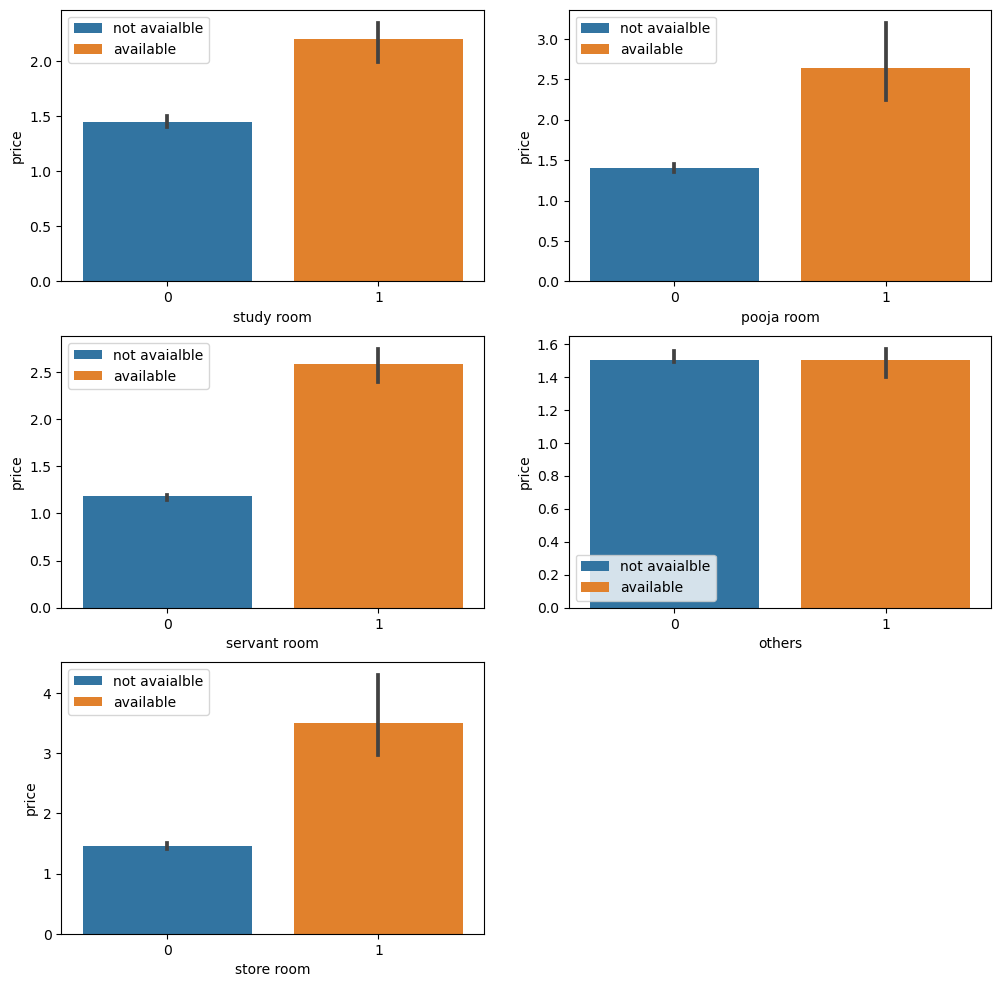

In [25]:
plt.figure(figsize=(12,12))
for index,value in enumerate(['study room','pooja room','servant room','others','store room'],1):
    plt.subplot(3,2,index)
    sns.barplot(x=df[value],y=df['price'],estimator='median',label=['not avaialble','available'])
    plt.legend()

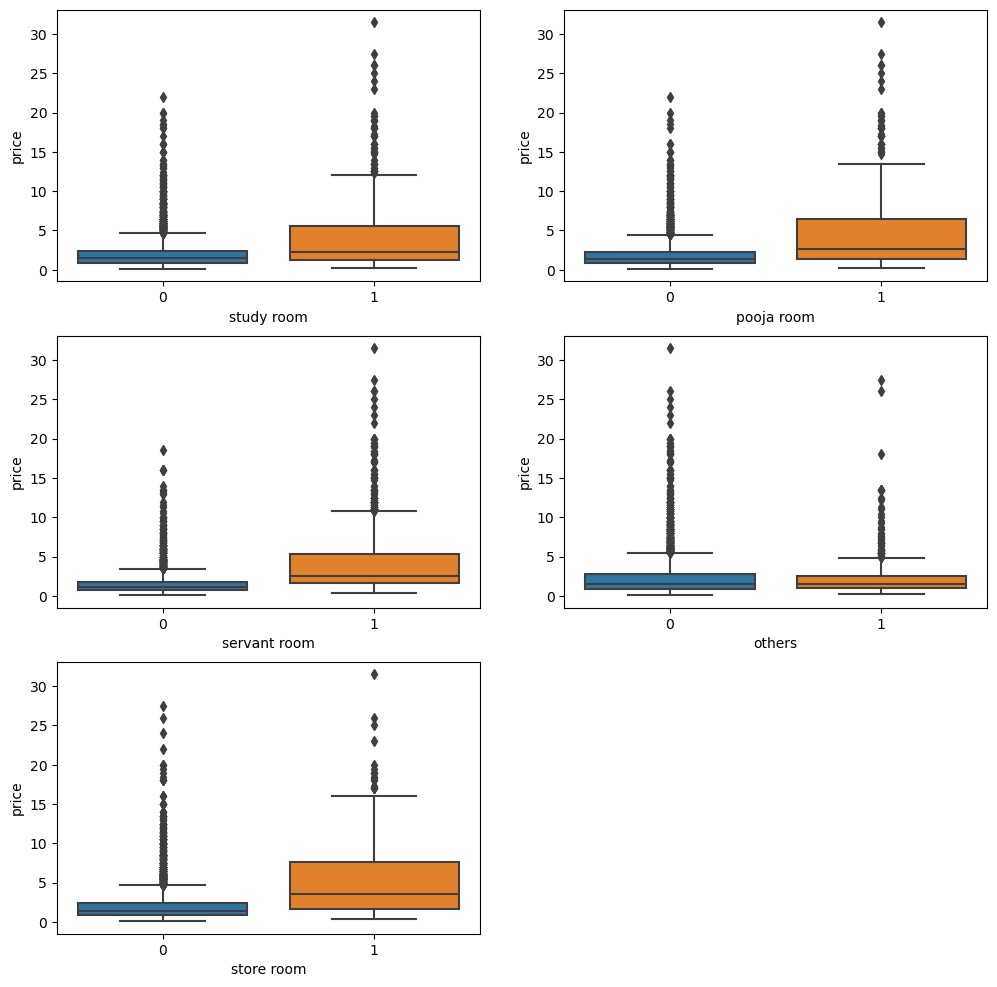

In [26]:
plt.figure(figsize=(12,12))
for index,value in enumerate(['study room','pooja room','servant room','others','store room'],1):
    plt.subplot(3,2,index)
    sns.boxplot(x=df[value],y=df['price'])

In [27]:
l=['study room','pooja room','servant room','others','store room']
for i in l:
    print(f'stat for {i} when {i} is not available is as follow: ')
    print(df[df[i]==0]['price'].describe())
    print(f'stat for {i} when {i} is available is as follow: ')
    print(df[df[i]==1]['price'].describe())
    print('*'*100)

stat for study room when study room is not available is as follow: 
count    3086.000000
mean        2.138597
std         2.294171
min         0.080000
25%         0.870000
50%         1.450000
75%         2.400000
max        22.000000
Name: price, dtype: float64
stat for study room when study room is available is as follow: 
count    709.000000
mean       4.104415
std        4.557365
min        0.280000
25%        1.230000
50%        2.200000
75%        5.600000
max       31.500000
Name: price, dtype: float64
****************************************************************************************************
stat for pooja room when pooja room is not available is as follow: 
count    3126.000000
mean        2.039267
std         2.130202
min         0.080000
25%         0.860000
50%         1.400000
75%         2.300000
max        22.000000
Name: price, dtype: float64
stat for pooja room when pooja room is available is as follow: 
count    669.000000
mean       4.686084
std        4.75

Room Types and Price Impact:

Houses that include a study room, pooja room, servant room, or store room tend to have significantly higher prices compared to houses without these specific rooms.

Houses with these additional rooms have price ranges as follows:

Store Room: 1.65 to 7.57 crore

Pooja Room: 1.37 to 6.5 crore

Study Room: 1.23 to 5.6 crore

Servant Room: 1.65 to 5.3 crore

Price Range without These Rooms:

Houses without these specific rooms have a more modest price range, falling between 0.7 to 2.42 crore.

Standard Deviation and Potential Outliers:

The presence of higher standard deviation in the categories with additional rooms indicates that there is a wider spread of prices around the mean.

This suggests potential outliers in these categories, implying that there are some houses with exceptionally high or low prices compared to the majority. Further investigation is needed to understand the nature of these outliers.

In summary, the analysis suggests that the presence of specific rooms such as study rooms, pooja rooms, servant rooms, or store rooms significantly impacts the price of houses. Houses with these rooms tend to command higher prices, possibly due to their additional features and amenities. On the other hand, houses without these rooms are generally more affordable. The presence of potential outliers in categories with additional rooms highlights the need for further investigation to understand the factors contributing to these extreme price variations within these categories.


In [28]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,store room,pooja room,others,servant room,furnishing_type,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,0,0,1,0,0,0,91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,0,0,0,0,0,1,0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,0,0,0,0,0,2,14
3,flat,sector 109,ats kocoon,1.70,9742.0,1745.02,Super Built up area 1745(162.12 sq.m.)Built Up...,NaN,1550.0,1745.0,3.0,3.0,3,22.0,East,Relatively New,0,0,0,0,0,1,74
4,flat,sector 37c,corona optus,1.50,6361.0,2358.12,Super Built up area 2358(219.07 sq.m.),NaN,NaN,2358.0,3.0,4.0,3+,14.0,North-East,New Property,0,0,0,1,1,1,83


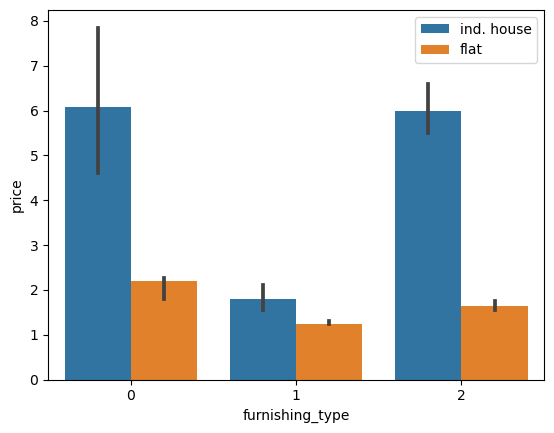

In [49]:
sns.barplot(x=df['furnishing_type'],y=df['price'],hue=df['property_type'],estimator='median')
plt.legend();

<Axes: xlabel='furnishing_type', ylabel='price'>

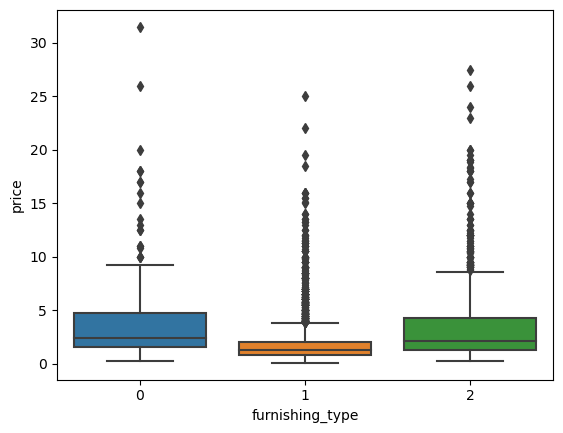

In [30]:
sns.boxplot(x=df['furnishing_type'],y=df['price'])

In [31]:
l=list(df['furnishing_type'].value_counts().sort_index().index)
for i in l:
    a=df[df['furnishing_type']==i]['price'].describe()
    print(f'stat for flat with {i} furnishing type is:\n{a}')
    print('*'*100)

stat for flat with 0 furnishing type is:
count    213.000000
mean       4.013756
std        4.432951
min        0.220000
25%        1.550000
50%        2.400000
75%        4.780000
max       31.500000
Name: price, dtype: float64
****************************************************************************************************
stat for flat with 1 furnishing type is:
count    2511.000000
mean        1.955516
std         2.244220
min         0.080000
25%         0.800000
50%         1.300000
75%         2.000000
max        25.000000
Name: price, dtype: float64
****************************************************************************************************
stat for flat with 2 furnishing type is:
count    1071.000000
mean        3.496275
std         3.625817
min         0.220000
25%         1.300000
50%         2.150000
75%         4.250000
max        27.500000
Name: price, dtype: float64
***********************************************************************************************

Price Discrepancies: The price of a fully furnished flat is typically expected to be higher than an unfurnished or semi-furnished flat, but you've noticed some unusual pricing patterns.

Price Ranges:

Unfurnished flats have a wide price range, ranging from 1.55 to 4.78 crore.
Semi-furnished flats have a narrower price range, ranging from 0.8 to 2 crore.
Furnished flats also have a wide price range, from 1.3 to 4.25 crore.
Standard Deviation: The high standard deviation suggests that there is significant variability in the prices within each furnishing type category. This implies that some flats within each category might be priced much higher or lower than the average.

Potential Outliers: The presence of potential outliers within the data can skew the mean price. Investigating these outliers is crucial to understanding why some flats within a category are priced exceptionally high or low.

To further investigate these discrepancies, you can consider the following steps:

Identify Outliers: Use statistical methods or visualizations like box plots to identify potential outliers within each furnishing type category. Investigate why these outliers exist and if there are any unique characteristics associated with them.



In [32]:
df.head()

,property_type,sector_info,society,price,price_per_sqft,area,areaWithType,carpet_area,built_up_area,super_built_area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,study room,store room,pooja room,others,servant room,furnishing_type,luxury_score
0,ind. house,sector 24,dlf city plots phase 3,5.00,34083.0,1467.00,Plot area 163(136.29 sq.m.),NaN,1467.0,NaN,13.0,13.0,3+,4.0,North,New Property,0,0,1,0,0,0,91
1,ind. house,sector 105,rajendra park gurgaon,0.37,10277.0,360.00,Plot area 360(33.45 sq.m.),NaN,360.0,NaN,4.0,3.0,2,3.0,East,Relatively New,0,0,0,0,0,1,0
2,flat,sector 12,ss residency,0.53,4818.0,1100.04,Super Built up area 1100(102.19 sq.m.),NaN,NaN,1100.0,3.0,3.0,2,2.0,NaN,Relatively New,0,0,0,0,0,2,14
3,flat,sector 109,ats kocoon,1.70,9742.0,1745.02,Super Built up area 1745(162.12 sq.m.)Built Up...,NaN,1550.0,1745.0,3.0,3.0,3,22.0,East,Relatively New,0,0,0,0,0,1,74
4,flat,sector 37c,corona optus,1.50,6361.0,2358.12,Super Built up area 2358(219.07 sq.m.),NaN,NaN,2358.0,3.0,4.0,3+,14.0,North-East,New Property,0,0,0,1,1,1,83


<Axes: xlabel='price', ylabel='agePossession'>

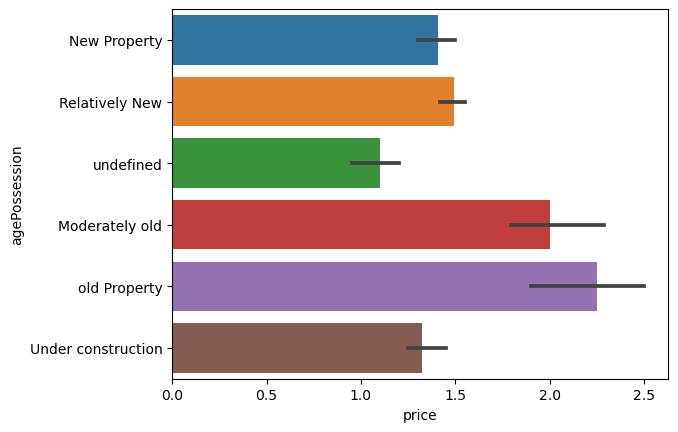

In [33]:
sns.barplot(y=df['agePossession'],x=df['price'],estimator='median')

<Axes: xlabel='agePossession', ylabel='price'>

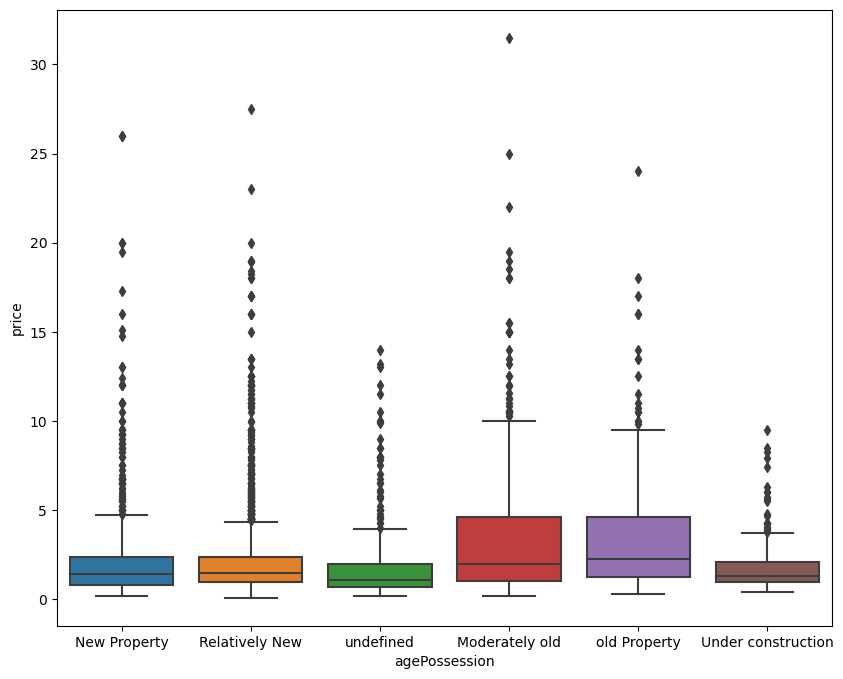

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['agePossession'],y=df['price'])

In [35]:
for i in list(df['agePossession'].value_counts().index):
    a=df[df['agePossession']==i]['price'].describe()
    print(f"stats for {i} is\n{a}")
    print('*'*100)

stats for Relatively New is
count    1665.000000
mean        2.268174
std         2.674875
min         0.080000
25%         0.980000
50%         1.490000
75%         2.350000
max        27.500000
Name: price, dtype: float64
****************************************************************************************************
stats for New Property is
count    608.000000
mean       2.347648
std        3.110617
min        0.200000
25%        0.800000
50%        1.405000
75%        2.362500
max       26.000000
Name: price, dtype: float64
****************************************************************************************************
stats for Moderately old is
count    588.000000
mean       3.423963
std        3.736472
min        0.160000
25%        1.000000
50%        2.000000
75%        4.612500
max       31.500000
Name: price, dtype: float64
****************************************************************************************************
stats for old Property is
count    341.0000

    It seems that relatively new,new property,undefined,under construction has almost same price range from 0.7 to 2.35 crore
    however old property and properties which are 5 to 10 years old are ranging between 1 crore to 4.6 crore

C:\Users\kapil\AppData\Local\Temp\ipykernel_25904\1408828757.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

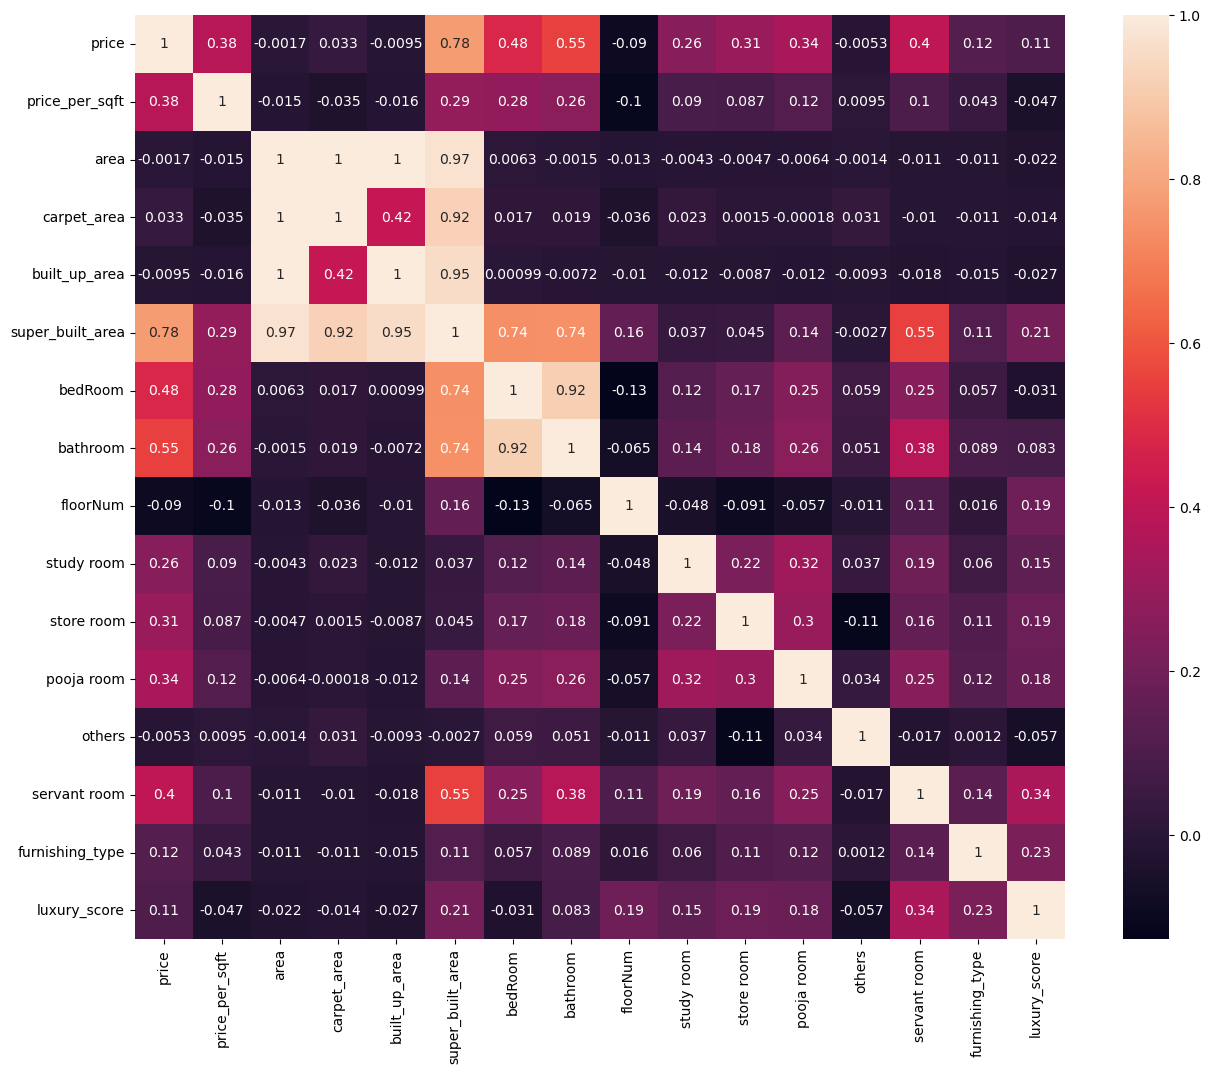

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)

from the correleation graph it seems that

1) Price column is depend upon bathroom,bedroom,super_built_area,price_per_sqft,study_room,store_room,pooja_room,servant_room

2) Their is seem to be a strong multicolinearity between area,carpet_area,built_up_area, and super_built_area also between bathroom and bedroom

3) luxury score is depend upon furnishing type and servant room available

<Axes: xlabel='bedRoom', ylabel='price'>

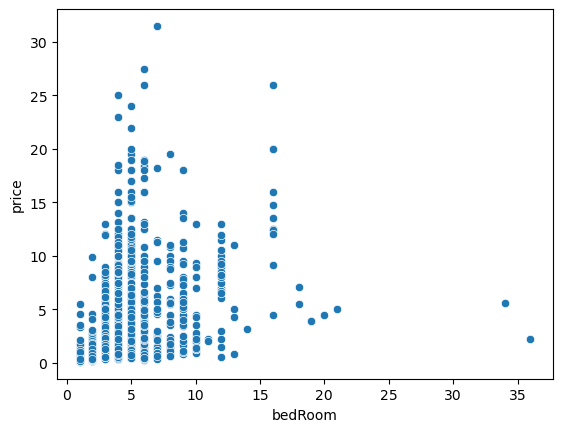

In [40]:
sns.scatterplot(x=df['bedRoom'],y=df['price'])

From the data it seems that their is some sort of positive linear relationship price and number of bedRoom.

i.e. As number of bedroom increases price of houses also increases

correlation matrix shows that 48 percent linear relationship between price and bedroom

Their are some houses where number of bedroom are more but price is comparitively very low and vice versa.

It seems that their are potential outliers present in both bedroom and price column

<Axes: xlabel='bathroom', ylabel='price'>

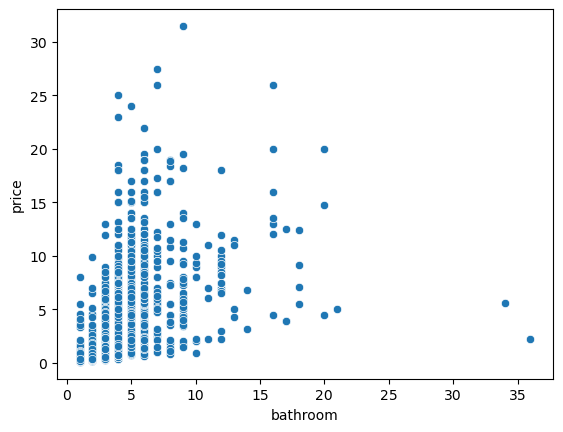

In [43]:
sns.scatterplot(x=df['bathroom'],y=df['price'])

From the data it seems that their is some sort of positive linear relationship price and number of bathroom.

i.e. As number of bathroom increases price of houses also increases

correlation matrix shows that 55 percent linear relationship between price and bathroom

Their are some houses where number of bathroom are more but price is comparitively very low and vice versa.

It seems that their are potential outliers present in both bathroom and price column

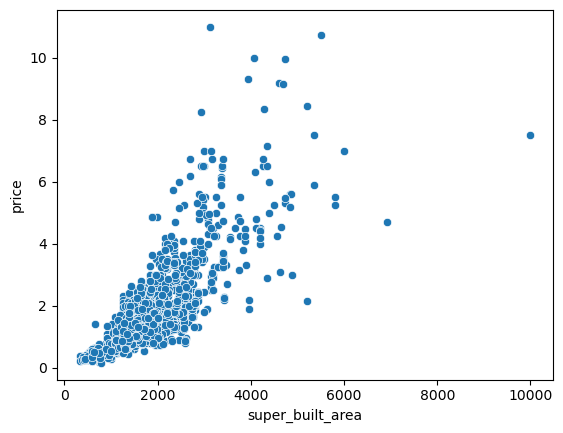

In [45]:
sns.scatterplot(x=df['super_built_area'],y=df['price']);

From the data it seems that their is strong linear relationship between super buit up area and price

As a super built up area increases price also increases linearly

from correlation matrix it seem that ther is 78 percent linear relationship between super built up area and price

<Axes: xlabel='price_per_sqft', ylabel='price'>

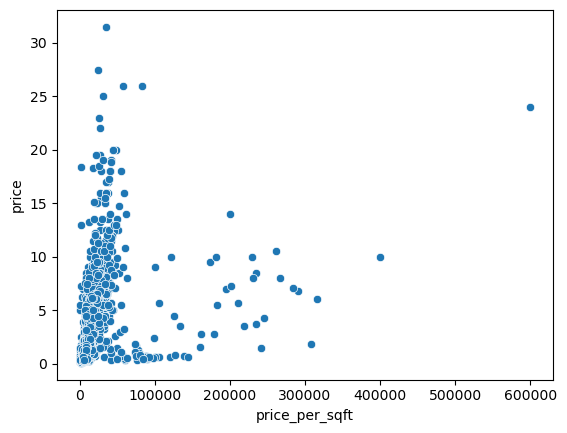

In [46]:
sns.scatterplot(x=df['price_per_sqft'],y=df['price'])

Their is positive linear relationship price_per_sqft and price

as price per sqft increase price also increase 

Their are potential outliers in both price and price_per_sqft

their are 38 percent linear relation between price_per_sqft and price